<a name="top"> <h1>2.1. Dummy Model</h1> <a>

<p>Payments Fraud Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F1 y F2 score
   - Curva ROC

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 


En este documento, nos centraremos en la creación de un **modelo Dummy, el cual se caracteriza por hacer predicciones que ignoran los input de entrada X, dependiendo únicamente de los valores objetivos Y. Es por ello que las predicciones se asignarán al valor mayoritario.**

Una vez creado el modelo, procederemos a optimizarlo con los valores de train y predecir los valores de test.

Este modelo, **nos servirá como base para poder compararlo con otros tipos de modelos mucho más complejos y contrastar los resultados**. Para ello utilizaremos diferéntes metricas como: Matrices de confusión, curva de ganancia, F1 score, F2 y curva ROC.

# <a name="librerias"> 1. Importación de librerias y funciones <a> 


Importamos las librerias necesarias para la creación y optimización del modelo base:

In [2]:
# Import basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import sklearn metrics.

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score, roc_auc_score, plot_confusion_matrix

# Import sklearn models and pipeline.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier 

Importamos las funciones a utilizar:

In [3]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [4]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [5]:
# Load the train dataset separated by other variables and target. Taking into account that the first column is the index.

x_train = pd.read_csv("../data/processed/x_train.csv",index_col=0 )
y_train = pd.read_csv("../data/processed/y_train.csv",index_col=0 )

# Load the validation dataset separated by other variables and target. Taking into account that the first column is the index.

x_val = pd.read_csv("../data/processed/x_val.csv",index_col=0 )
y_val = pd.read_csv("../data/processed/y_val.csv",index_col=0 )

# <a name="creacion"> 3. Creación del modelo <a> 

Para la creación del modelo base, **utilizaremos el modelo _DummyClassifier_**. Para este modelo creado por Sklearn asignaremos como estrategia 'most_frequent', que selecciona como predicciones la clase más frecuente. **El dataset al estar tan desbalanceado hacia los casos no fraudulentos, está claro que el modelo predecirá esa clase para todas las observaciones.** 

Creamos un Pipeline que junte el preprocesado y el modelo Dummy Classifier para ejecutarlo en el orden mencionado:

In [6]:
# Designate the hyperparameters.

strategy='most_frequent'
random_state = 12345


# Creation of a pipeline that applies a preprocess of the data and then the Dummy model.

dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clasificador',  DummyClassifier(strategy=strategy, random_state=random_state)
    )])


# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [9]:
# Optimization of the dummy_model with the train set: input and target data. 

dummy_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount',
                                                   'connection_time',
                                                   'oldbalanceOrg', 'age',
                                                   'newbalanceOrig',
                                                   'user_number',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('clasificador',
                 DummyClassifier(random_state=12345,
                                 strategy='most_frequent'))])

Una vez optimizado el modelo dummy, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [10]:
# Save the backup of the dummy optimziation as a pickle file.

save_model(dummy_model,'../models/dummy_model.pickle')

**Para evitar optimizar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [11]:
# Load the GLM model already fitted in /models.

dummy_model = load_model('../models/dummy_model.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a> 

Una vez realizada la optimización del modelo Dummy, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar como se comporta el modelo y su score.

In [12]:
# Predict the target value of the validation set.

predictions = dummy_model.predict(x_val)

# Predict the probabilities of the target value for the validation set.

predict_probabilities = dummy_model.predict_proba(x_val)

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

### 6.1. Matriz de confusión

#### 6.1.1. Definición

_La matriz de confusión es de los parámetros más importantes, dado que de el nacen otros parámetros como el de accuracy, precision y recall. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error._

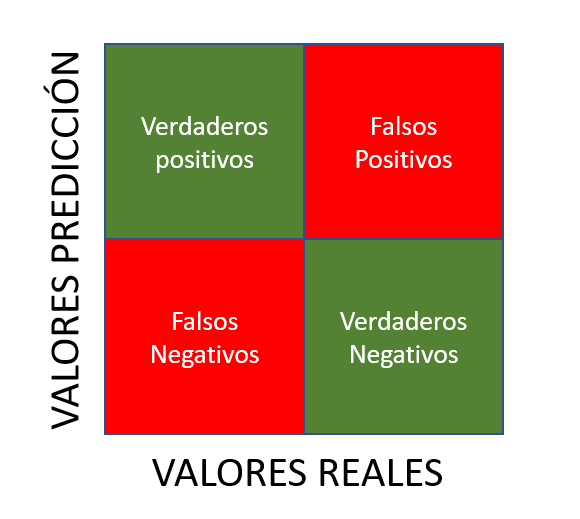

#### 6.1.2. Evaluación del modelo

Procedemos a evaluar el modelo, calculando y representando graficamente su matriz de confusión sin normalizar y normalizada, para poder observar de una forma más sencilla, los aciertos/errores del modelo

Confusion matrix, without normalization
[[196394      0]
 [   214      0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


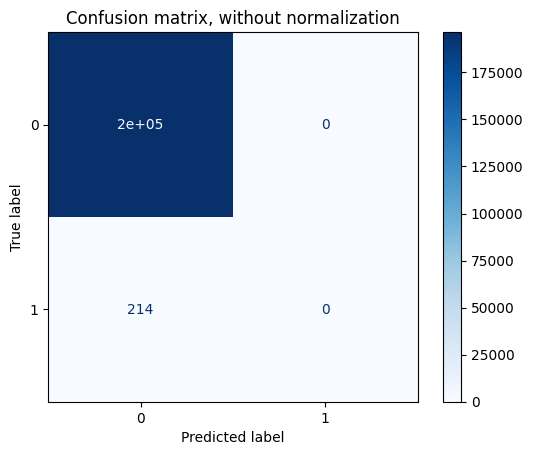

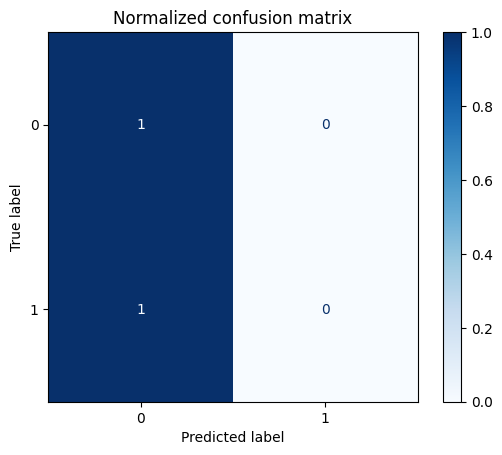

In [13]:
# List with the titles and parameters of the plot.

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Loop to plot the confusion matrix normalized and not normalized.
for title, normalize in titles_options:
    
    disp = plot_confusion_matrix(dummy_model, x_val,y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
#Display the confusion matrix.

plt.show()

Como podemos observar para el set de validación, la predicción tiene un **número de 196394 negativos reales y 214 observaciones con falsos negativos**. Esto se debe a que **nuestro modelo, al ser tan simple detecta todas las observaciones del set como transacciones no fraudulentas, equivocandose en la minoría, que son las fraudulentas**.

Como podemos ver en la gráfica el modelo tiene practicamente un gran % de acierto, pero principalmente debido a que el dataset esta tán desbalanceado que el error es muy bajo. **No es eficiente utilizarlo, debido a que no llega a predecir ningún tipo de fraude.**

### 6.2. Métricas: Accuracy, Recall, Precision, F1 y F2 score

#### 6.2.1. Definición

 - _La métrica **Accuracy** representa el porcentaje de predicciones correctas frente al total. Por tanto, es el cociente entre los casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la diagonal de la matriz de confusión), y la suma de todos los casos._
 
 
 - _La métrica **Recall** de una clase expresa como de  bien puede el modelo detectar a esa clase._
 
 
 - _La métrica **Precision** de una clase define como de confiable es un modelo en responder si un punto pertenece a esa clase_.
 
 
 - _La métrica **F1 Score** de una clase es dada por la media harmonía de precisión y recall (2 * precision * recall / (precision+recall)) digamos que combina precisión y recall en una sola métrica._
 
 
 - _La métrica **F2 Score** de una clase es dada por la media harmonía de precisión y recall. Sin embargo, en ésta metrica el recall tiene un mayor peso que la precisión. Llega a detectar falsos positivos de más con el objetivo de penalizar el fraude, por lo que **esta métrica será muy importante para nuestro modelo**_.

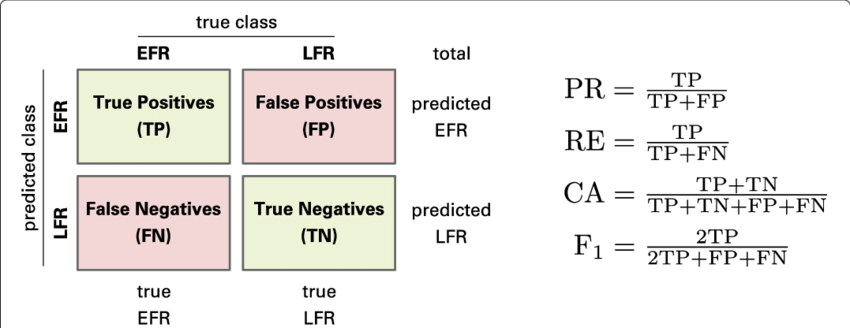

#### 6.2.2. Evaluación del modelo

In [14]:
# Display the metrics values.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.00      0.00      0.00       214

    accuracy                           1.00    196608
   macro avg       0.50      0.50      0.50    196608
weighted avg       1.00      1.00      1.00    196608



In [17]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_val, predictions))

F2 score is 0.0
Accuracy: 0.9989115397135416


- El modelo nos calcula un **accuracy del 99.89 %**, **muy alto pero muy poco eficiente** para detectar fraude, debido al gran desbalanceo.


- El modelo nos calcula un **Recall de 1**, dado que predice todos los valores como clase mayoritaria, su % de acierto es prácticamente un 100% debido al pequeño número de fraudes que hay.


- El modelo nos calcula una **Precisión de 1**, debido a las mismas razones que antes. 


- El modelo nos calcula un **F1 score de 1**, debido a que al combinar Recall y Precision que eran del 100% tiene el mismo valor.


- El modelo nos calcula un **F2 score de 0**, un valor nada deseado para nuestro modelo. 

### 6.3. Curva ROC

#### 6.3.1. Definición

_La **curva ROC** nos dice qué tan bueno puede distinguir el modelo entre dos cosas, por ejemplo, si un paciente tiene cáncer o no. Mejores modelos pueden distinguir con precisión entre los dos, mientras que un modelo pobre tendrá dificultades para distinguir entre los dos._

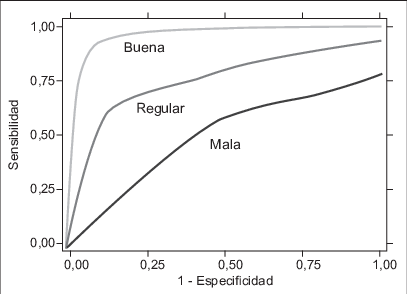

#### 6.3.2. Evaluación del modelo

Para evaluar nuestro modelo, lo representaremos graficamente para deducir que tan bueno es el modelo.

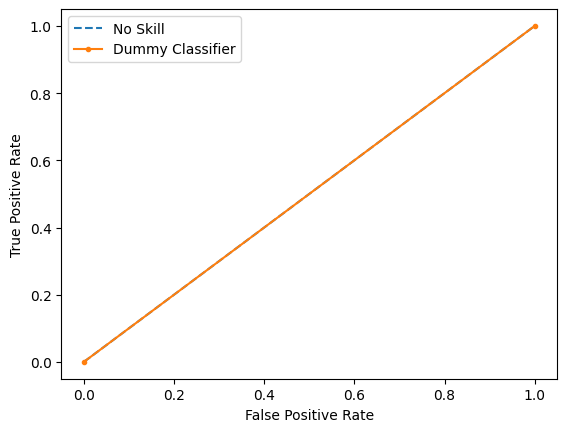

The Compute Area Under the Receiver Operating Characteristic is 0.5


In [25]:
# Keep probabilities for the positive outcome only.

yhat = predict_probabilities[:, 1]

# Calculate roc curves.

fpr, tpr, thresholds = roc_curve(y_val, yhat)

# Plot the roc curve for the model.

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Dummy Classifier')

# Axis labels.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot.

plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

Una vez representada la **curva ROC**, la cual tiene un área bajo la curva con **valor de 0.5**, observamos como nuestro modelo **no tiene capacidad de discriminación** para distinguir entre si comete o no fraude, por lo que solo con esto, ya podríamos ver que no serviría para aplicarlo a futuras observaciones.

[Ir arriba del documento](#top)